C:\Users\18vys\AppData\Local\Temp\ipykernel_22484\2902071864.py:6: DtypeWarning: Columns (7,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/18vys/Desktop/fuel.csv')


   vehicle_id  year        make               model  \
0       26587  1984  Alfa Romeo           GT V6 2.5   
1       27705  1984  Alfa Romeo           GT V6 2.5   
2       26561  1984  Alfa Romeo  Spider Veloce 2000   
3       27681  1984  Alfa Romeo  Spider Veloce 2000   
4       27550  1984  AM General   DJ Po Vehicle 2WD   

                         class          drive       transmission  \
0             Minicompact Cars            NaN     Manual 5-Speed   
1             Minicompact Cars            NaN     Manual 5-Speed   
2                  Two Seaters            NaN     Manual 5-Speed   
3                  Two Seaters            NaN     Manual 5-Speed   
4  Special Purpose Vehicle 2WD  2-Wheel Drive  Automatic 3-Speed   

  transmission_type  engine_index engine_descriptor  ...  \
0               NaN          9001             (FFS)  ...   
1               NaN          9005    (FFS) CA model  ...   
2               NaN          9002             (FFS)  ...   
3               NaN 

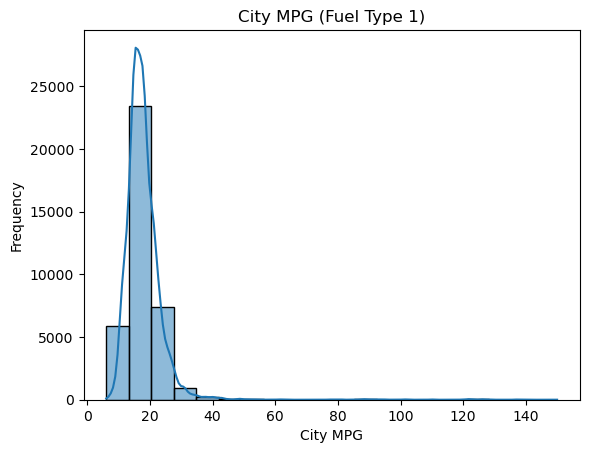

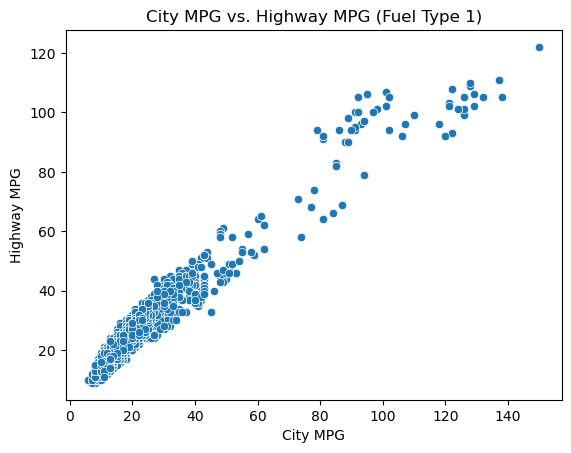

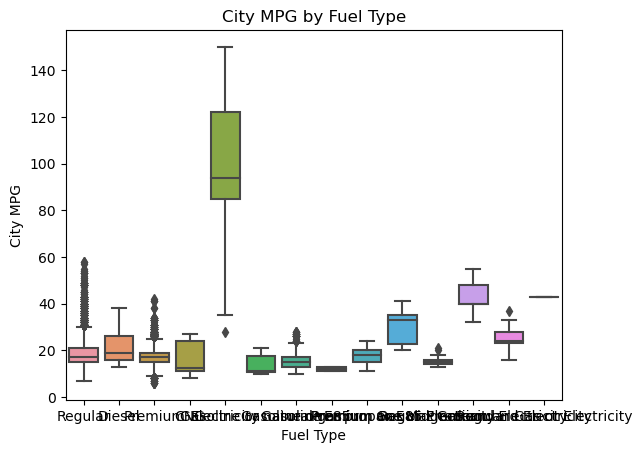

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
df = pd.read_csv('C:/Users/18vys/Desktop/fuel.csv')

# Inspect the first few rows of the DataFrame
print(df.head())

# Check data types and non-null values
print(df.info())

# Generate summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Example of EDA plots
sns.histplot(df['city_mpg_ft1'], bins=20, kde=True)
plt.title('City MPG (Fuel Type 1)')
plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.show()

sns.scatterplot(x='city_mpg_ft1', y='highway_mpg_ft1', data=df)
plt.title('City MPG vs. Highway MPG (Fuel Type 1)')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.show()

sns.boxplot(x='fuel_type', y='city_mpg_ft1', data=df)
plt.title('City MPG by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('City MPG')
plt.show()

# Example of feature engineering
df['new_feature'] = df['engine_displacement'] / df['engine_cylinders']
df_encoded = pd.get_dummies(df, columns=['drive', 'transmission_type', 'fuel_type'])


In this code:

1. I've added the provided column names from your dataset to the code.
2. I've used seaborn and matplotlib to create exploratory data analysis (EDA) plots based on your data. These plots include a histogram of city MPG for fuel type 1, a scatter plot comparing city MPG and highway MPG for fuel type 1, and a box plot showing city MPG by fuel type.
3. I've demonstrated feature engineering by creating a new feature called 'new_feature' which is calculated as the ratio of engine displacement to engine cylinders.
4. Lastly, I've encoded categorical variables using one-hot encoding for the 'drive', 'transmission_type', and 'fuel_type' columns.

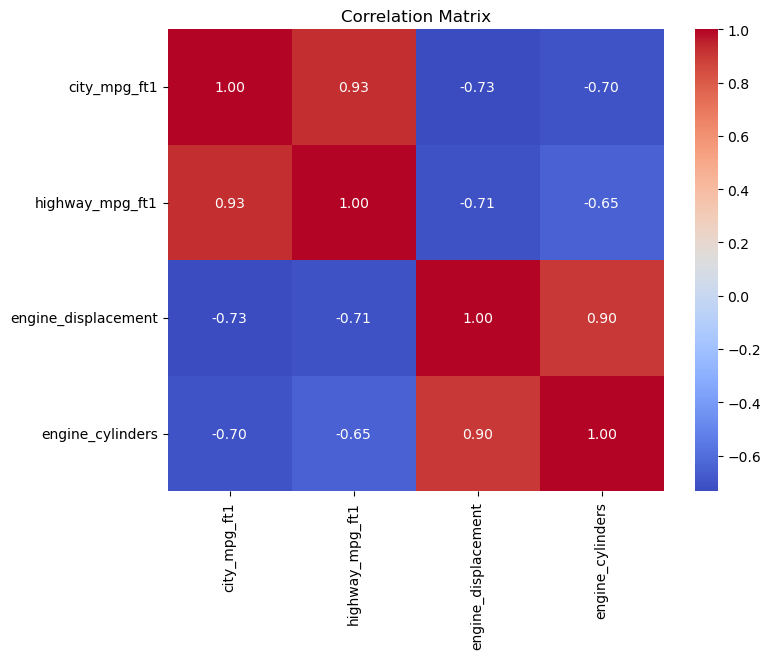

In [3]:
# Calculate correlation matrix
correlation_matrix = df[['city_mpg_ft1', 'highway_mpg_ft1', 'engine_displacement', 'engine_cylinders']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


1. Calculate the correlation coefficients between city MPG, highway MPG, and other numerical variables in the dataset.
2. Use the correlation matrix to identify variables that are strongly correlated with fuel economy metrics.
3. Visualize the correlations using a heatmap for better interpretation.

In [4]:
from scipy.stats import f_oneway

# Example of one-way ANOVA for fuel type vs. city MPG
fuel_type_groups = df.groupby('fuel_type')['city_mpg_ft1'].apply(list)
f_statistic, p_value = f_oneway(*fuel_type_groups)
print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 2854.0844832917105
p-value: 0.0


Hypothesis Testing:
1. Conduct hypothesis tests to determine whether there are significant differences in fuel economy between different categories of a categorical variable (e.g., fuel type).
2. Perform one-way ANOVA or t-tests depending on the number of categories and assumptions of the data.

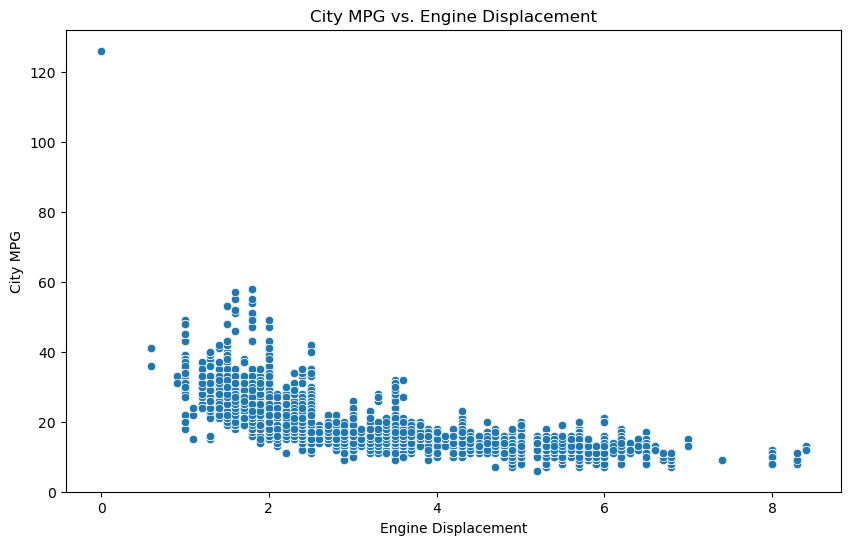

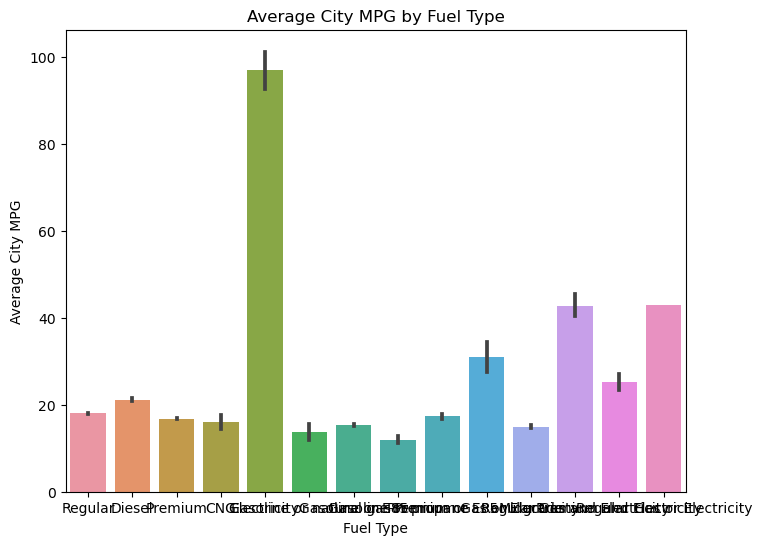

In [5]:
# Scatter plot: City MPG vs. Engine Displacement
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_displacement', y='city_mpg_ft1', data=df)
plt.title('City MPG vs. Engine Displacement')
plt.xlabel('Engine Displacement')
plt.ylabel('City MPG')
plt.show()

# Bar plot: Average City MPG by Fuel Type
plt.figure(figsize=(8, 6))
sns.barplot(x='fuel_type', y='city_mpg_ft1', data=df)
plt.title('Average City MPG by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average City MPG')
plt.show()


Visualization:
1. Since we're interested in exploring relationships between fuel economy and other variables, we can create scatter plots to visualize these relationships.
2. Additionally, we can use bar plots to compare average fuel economy across different categories of a categorical variable (e.g., fuel type).

In [7]:
from sklearn.impute import SimpleImputer

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the imputed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 33.20647089783346
R-squared: 0.2771049277404828


1. Imputation: You can use an imputer transformer to fill in missing values with a specific strategy, such as mean, median, or mode imputation.
2. Drop Missing Values: If the number of missing values is relatively small compared to the size of the dataset, you can drop rows with missing values.
3. Use a Model that Handles NaNs: Consider using a model that can handle missing values natively, such as HistGradientBoostingRegressor from the sklearn.ensemble module.